In [1]:
from scipy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def czt(x, m=None, w=None, a=None):
    # Translated from GNU Octave's czt.m

    n = len(x)
    if m is None: m = n
    if w is None: w = np.exp(-2j * np.pi / m)
    if a is None: a = float(1)

    chirp = w ** (np.arange(1 - n, max(m, n)) ** 2 / 2.0)
    N2 = int(2 ** np.ceil(np.log2(m + n - 1)))  # next power of 2
    xp = np.zeros(N2, dtype=np.complex64)
    xp[0:n] = x * a ** -np.arange(n)  * chirp[n - 1 : n + n - 1]
    # xp = append(x * a ** -arange(n) * chirp[n - 1 : n + n - 1], zeros(N2 - n))
    ichirpp = np.zeros(N2, dtype=np.complex64)
    ichirpp[0:m + n - 1] = 1 / chirp[: m + n - 1]
    # ichirpp = append(1 / chirp[: m + n - 1], zeros(N2 - (m + n - 1)))
    r = np.fft.ifft(np.fft.fft(xp) * np.fft.fft(ichirpp))
    return r[n - 1 : m + n - 1] * chirp[n - 1 : m + n - 1]

In [3]:
x = np.random.rand(43)
for i in range(x.shape[0]):
    x[i] = np.sin(i/3)

In [4]:
for i, v in enumerate(x):
    print(i, v)

0 0.0
1 0.3271946967961522
2 0.618369803069737
3 0.8414709848078965
4 0.9719379013633127
5 0.9954079577517649
6 0.9092974268256817
7 0.7230858817383246
8 0.457272626635812
9 0.1411200080598672
10 -0.19056796287548539
11 -0.5012770485883448
12 -0.7568024953079283
13 -0.9290145012707619
14 -0.9989549170979283
15 -0.9589242746631385
16 -0.81332939156758
17 -0.5781982417443089
18 -0.27941549819892586
19 0.050127009882172724
20 0.37415123057121996
21 0.6569865987187891
22 0.867496869618806
23 0.9825077869863732
24 0.9893582466233818
25 0.8872941080946944
26 0.6875512151130617
27 0.4121184852417566
28 0.0913172355547493
29 -0.2395367731303159
30 -0.5440211108893698
31 -0.7886162822232242
32 -0.946395756838108
33 -0.9999902065507035
34 -0.9434996270154847
35 -0.78314284623659
36 -0.5365729180004349
37 -0.23093376590116807
38 0.10012798554657276
39 0.4201670368266409
40 0.6939515345770562
41 0.8913416091820802
42 0.9906073556948704


In [5]:
res = czt(x, m=None, w=None) # , a=None)

In [7]:
for i, v in enumerate(res):
    print(i, v)

0 (3.061068115457921-1.0216064649792855e-07j)
1 (3.9137341036895994-1.6086978148956907j)
2 (14.970644168306809-11.174525153561936j)
3 (-5.438287160710346+5.26866167558101j)
4 (-2.2521782521373743+2.4386699730247994j)
5 (-1.4669294122738734+1.6347904516742486j)
6 (-1.1307463816551424+1.234760826674682j)
7 (-0.9514402603429298+0.9872512254552432j)
8 (-0.8433643020863945+0.8149239280600371j)
9 (-0.7728924988990671+0.6856184112074404j)
10 (-0.7243592358566076+0.5833855266409355j)
11 (-0.6895836353167898+0.49933144133758584j)
12 (-0.663928345643711+0.4280628189137474j)
13 (-0.6445975234381864+0.36609100041017933j)
14 (-0.6298229764319151+0.31104186761389635j)
15 (-0.6184442784552231+0.26122725624871557j)
16 (-0.6096786278749439+0.21540056299196805j)
17 (-0.6029873911282805+0.17260799470886598j)
18 (-0.5979964282246198+0.13209391251998864j)
19 (-0.5944484481546255+0.09323705446858702j)
20 (-0.5921704385213818+0.05550673073745897j)
21 (-0.5910567309542856+0.018430579858955312j)
22 (-0.5910568

In [14]:
# Manual computation 
n = len(x)
m = n
w = np.exp(-2j * np.pi / m)
a = float(1)

chirp = w ** (np.arange(1 - n, max(m, n)) ** 2 / 2.0)
N2 = int(2 ** np.ceil(np.log2(m + n - 1)))  # next power of 2
xp = np.zeros(N2, dtype=np.complex64)
xp[0:n] = x * a ** -np.arange(n)  * chirp[n - 1 : n + n - 1]
# xp = append(x * a ** -arange(n) * chirp[n - 1 : n + n - 1], zeros(N2 - n))
ichirpp = np.zeros(N2, dtype=np.complex64)
ichirpp[0:m + n - 1] = 1 / chirp[: m + n - 1]
# ichirpp = append(1 / chirp[: m + n - 1], zeros(N2 - (m + n - 1)))
res1 = np.fft.fft(xp)
res2 = np.fft.fft(ichirpp)
res3 = res1 * res2
r = np.fft.ifft(np.fft.fft(xp) * np.fft.fft(ichirpp))
# return r[n - 1 : m + n - 1] * chirp[n - 1 : m + n - 1]

In [16]:
for i in range(res1.shape[0]):
    print(i, res1[i], "      ", res2[i], "      ", res3[i])

0 (-2.029556304216385-0.4989264588803053j)        (1+0j)        (-2.029556304216385-0.4989264588803053j)
1 (2.9698180074982403-0.2925788108646703j)        (2.535952461692868-8.802870000048529j)        (4.955784050084492-26.884887799461588j)
2 (0.5133538492111083-5.212077356676426j)        (-10.125707310795358+1.152816638601018j)        (0.8104986744703397+53.36777265378988j)
3 (-3.6285000398423004-0.7762739384446409j)        (1.0054491256394107+0.004965279407686651j)        (-3.6444177754407248-0.798520469194445j)
4 (1.902996652854885+1.4487863754903976j)        (0.8521767120084638-8.335093933170459j)        (13.697459959403018-14.627033846186375j)
5 (1.476555459691337-4.581987393810282j)        (-11.220952479363834+0.8618171262606693j)        (-12.619523438045524+52.68678359002501j)
6 (-4.342770049801513-1.6835758688856548j)        (1.0046162479588328-0.1785546030527696j)        (-4.663427574157689-0.9159260901621726j)
7 (0.37533469263344693+2.8471411797512323j)        (-2.10234864300

In [18]:
for i in range(r.shape[0]):
    print(i, r[i])

0 (-1.6653345369377348e-16+1.4988010832439613e-15j)
1 (-0.32719470000364254+7.855982531168593e-11j)
2 (-0.9229426875720361+0.0633102525219667j)
3 (-1.5930344457272894+0.28376108573602743j)
4 (-1.957533263154708+0.6530959454795032j)
5 (-1.6185145963958885+0.9288670695717608j)
6 (-0.6090888817357157+0.7618249415195357j)
7 (0.3509434647085694+0.20969052681749956j)
8 (0.5405449369642867-0.06777631817597785j)
9 (0.2492345070882192+0.1434442265986169j)
10 (0.09054000149741237-0.062150415610619514j)
11 (-0.2305217578926133-0.5322825621604754j)
12 (-0.3562330712742594+0.21978631195299636j)
13 (0.3800858676564129+0.5431149383929986j)
14 (0.12949489293837896-0.6019508108099398j)
15 (-0.3870411031219232+0.09451481900673114j)
16 (0.25204596389842915+0.28862807589510814j)
17 (-0.052292782447740604-0.31018245623888197j)
18 (0.003618101204880819+0.1394449408187417j)
19 (-0.09523016751987168+0.030976075484860033j)
20 (0.2334983563950499-0.138701048031323j)
21 (-0.3421690537811779+0.21014257377122814j)

In [ ]:
res2 = np.fft.fft(x)

In [ ]:
print(res2.shape)

In [ ]:
res - res2

In [ ]:
n = len(x)
m = None
w = None
a = None
if m is None: m = n
if w is None: w = np.exp(-2j * np.pi / m)
if a is None: a = float(1)

In [ ]:
chirp = w ** (np.arange(1 - n, max(m, n)) ** 2 / 2.0)
N2 = int(2 ** np.ceil(np.log2(m + n - 1)))  # next power of 2

In [ ]:
plt.plot(chirp)

In [ ]:
N2

In [ ]:
# xp = append(x * a ** -np.arange(n) * chirp[n - 1 : n + n - 1], zeros(N2 - n))

In [ ]:
# x * a ** -np.arange(n)  * chirp[n - 1 : n + n - 1]

In [ ]:
xp = np.zeros(N2, dtype=np.complex64)
xp[0:n] = x * a ** -np.arange(n) * chirp[n - 1 : n + n - 1]

In [ ]:
p1 = x * a ** -np.arange(n)
p2 = chirp[n - 1 : n + n - 1]

In [ ]:
print(p1.shape)
print(p2.shape)

In [ ]:
print(x[0])
print(x[1])
print(x[2])
print(x[3])
print(x[4])

In [ ]:
1.0 ** -2

In [ ]:
print(p1[3])
print(p2[3])

In [ ]:
p1[3] * p2[3]

In [ ]:
xp.shape

In [ ]:
for i, v in enumerate(xp):
    print(i, v) # , "   ", x[i] * a ** -i, p1[i], x[i])

In [ ]:
ichirpp = append(1 / chirp[: m + n - 1], zeros(N2 - (m + n - 1)))

In [ ]:
ichirpp = np.zeros(N2, dtype=np.complex64)
ichirpp[0:m + n - 1] = 1 / chirp[: m + n - 1]

In [ ]:
for i, v in enumerate(ichirpp):
    print(i,v )

In [ ]:
for i, v in enumerate(chirp):
    print(i,v )

In [ ]:
n = 43
m= 43
w = np.exp(-2j * np.pi / m)
np.arange(1 - n, n)

In [ ]:
r = np.arange(1 - n, n)

In [ ]:
r

In [ ]:
(r ** 2)

In [ ]:
chirp = w ** ((r ** 2) / 2.0)

In [ ]:
for v in chirp:
    print(v)

In [ ]:
chirp2 = w ** (np.arange(1 - n, max(m, n)) ** 2 / 2.0)

In [ ]:
chirp2

In [ ]:
w = np.exp(-2j * np.pi / m)

In [ ]:
w

In [ ]:
x.shape

In [ ]:
for i, v in enumerate(x):
    print(i, v)

In [19]:
y = np.fft.fft(x)

In [20]:
for i, v in enumerate(y):
    print(i, v)

0 (3.061067977180972+0j)
1 (3.9137341167366873-1.6086978457875534j)
2 (14.970644243111483-11.1745249526456j)
3 (-5.438287210008944+5.2686616941574895j)
4 (-2.252178304045864+2.438669949514698j)
5 (-1.4669294732267004+1.6347905015024258j)
6 (-1.130746278061533+1.2347608093839297j)
7 (-0.9514401306195844+0.9872514554518074j)
8 (-0.8433642477473287+0.8149239246048979j)
9 (-0.7728925260655526+0.6856185044610322j)
10 (-0.7243592250093562+0.5833853911046316j)
11 (-0.689583608873795+0.49933145220034125j)
12 (-0.6639284242896757+0.4280627602461462j)
13 (-0.6445976413294955+0.366091123098257j)
14 (-0.6298230790105521+0.31104190032226603j)
15 (-0.6184444175157934+0.2612271958373594j)
16 (-0.6096786522990184+0.21540055682049117j)
17 (-0.6029872104556624+0.17260814429898774j)
18 (-0.5979963732365882+0.13209400699993748j)
19 (-0.5944482958720156+0.09323698273769757j)
20 (-0.5921704556889418+0.05550662081234026j)
21 (-0.5910567950822564+0.018430658012600798j)
22 (-0.5910567950822564-0.01843065801260

In [21]:
391.817 / 3.061067977180972

128.00009765246568

In [22]:
xx = np.fft.ifft(y)

In [23]:
x_r = x-xx

In [24]:
x_r

array([ 1.49751013e-16+0.j,  2.77555756e-16+0.j,  3.33066907e-16+0.j,
        1.11022302e-16+0.j,  1.11022302e-16+0.j,  4.44089210e-16+0.j,
        2.22044605e-16+0.j,  0.00000000e+00+0.j,  5.55111512e-17+0.j,
       -1.11022302e-16+0.j, -1.11022302e-16+0.j, -1.11022302e-16+0.j,
        1.11022302e-16+0.j,  1.11022302e-16+0.j,  0.00000000e+00+0.j,
       -1.11022302e-16+0.j, -1.11022302e-16+0.j,  0.00000000e+00+0.j,
       -1.11022302e-16+0.j, -9.71445147e-17+0.j,  0.00000000e+00+0.j,
        2.22044605e-16+0.j,  1.11022302e-16+0.j,  1.11022302e-16+0.j,
        1.11022302e-16+0.j,  1.11022302e-16+0.j, -1.11022302e-16+0.j,
        2.22044605e-16+0.j, -2.08166817e-16+0.j, -2.77555756e-17+0.j,
        3.33066907e-16+0.j,  2.22044605e-16+0.j,  0.00000000e+00+0.j,
       -1.11022302e-16+0.j, -2.22044605e-16+0.j,  0.00000000e+00+0.j,
       -1.11022302e-16+0.j, -2.77555756e-16+0.j,  1.80411242e-16+0.j,
       -1.66533454e-16+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        1.11022302e-

In [30]:
# ICZT
n = len(y)
w = np.exp(-2j * np.pi / n)

chirp = w ** (np.arange(1 - n, max(m, n)) ** 2 / 2.0)
N2 = int(2 ** np.ceil(np.log2(m + n - 1)))  # next power of 2
xp = np.zeros(N2, dtype=np.complex64)
xp[0:n] = x * a ** -np.arange(n)  * chirp[n - 1 : n + n - 1]
ichirpp = np.zeros(N2, dtype=np.complex64)
ichirpp[0:m + n - 1] = 1 / chirp[: m + n - 1]

In [37]:
type(y[0])

numpy.complex128

In [39]:
s1 = czt(np.conj(y))

In [45]:
M = len(y)
N = M
W = np.exp(-2j * np.pi / M)
A = np.complex128(1.0)
W = np.complex128(W)

In [55]:
s2 = np.conj(s1) / M # , M=N, W=W, A=A, t_method="scipy", f_method="numpy") / M

In [60]:
s22 = np.real(s2)

In [62]:
s22 - x

array([ 1.48819177e-08,  7.15303039e-09,  2.55390131e-08,  1.45336569e-08,
        8.75802730e-09,  2.05557893e-09,  9.46607204e-09, -4.68012473e-09,
       -1.91556205e-08, -4.07609937e-08, -1.49061326e-08, -3.46199772e-08,
       -2.35931441e-08, -3.53249496e-08,  1.61302425e-08,  1.26823798e-08,
        8.85208018e-09,  2.10373174e-09,  6.12263235e-09,  1.83273746e-08,
        1.54963507e-08,  3.21899168e-08,  3.80610942e-08,  1.18376392e-08,
       -6.87221913e-09,  3.33326344e-09,  1.23726992e-08, -1.69239616e-08,
       -1.22778187e-08, -2.41778887e-08, -2.35759030e-08, -2.97576825e-08,
       -2.25153363e-08, -1.23130884e-08, -3.55942263e-08, -1.15058761e-08,
        6.51426257e-09,  1.51678999e-08,  1.01189653e-08,  3.59697473e-08,
        2.93880703e-08,  3.46394767e-08,  3.73718781e-08])

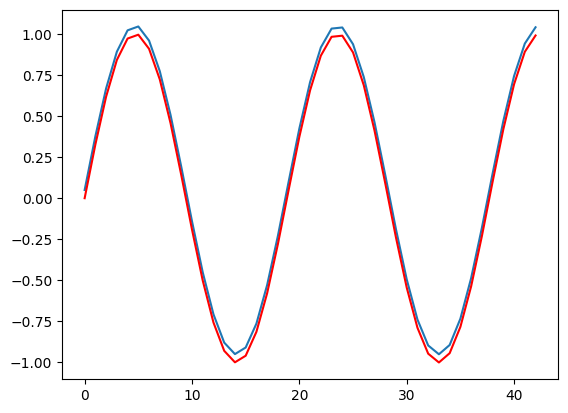

In [64]:
plt.plot(s22+.05)
plt.plot(x, "red")


In [43]:
np.abs(s2) -x

array([1.24026155e-06, 1.37421776e+01, 2.59715328e+01, 3.53417820e+01,
       4.08213922e+01, 4.18071343e+01, 3.81904923e+01, 3.03696068e+01,
       1.92054495e+01, 5.92703859e+00, 8.38499101e+00, 2.20561916e+01,
       3.32993108e+01, 4.08766396e+01, 4.39540157e+01, 4.21926675e+01,
       3.57864928e+01, 2.54407225e+01, 1.22942817e+01, 2.10533520e+00,
       1.57143524e+01, 2.75934385e+01, 3.64348702e+01, 4.12653276e+01,
       4.15530461e+01, 3.72663527e+01, 2.88771516e+01, 1.73089757e+01,
       3.83532337e+00, 1.05396191e+01, 2.39369299e+01, 3.46991177e+01,
       4.16414143e+01, 4.39995696e+01, 4.15139851e+01, 3.44582857e+01,
       2.36092081e+01, 1.01610850e+01, 4.20537583e+00, 1.76470171e+01,
       2.91459657e+01, 3.74363491e+01, 4.16055105e+01])

In [31]:
ttest = np.conj(czt(np.conj(X), M=N, W=W, A=A, t_method=t_method, f_method=f_method)) / M


NameError: name 'X' is not defined

In [ ]:
def czt(x, m=None, w=None, a=None):
    # Translated from GNU Octave's czt.m

    n = len(x)
    if m is None: m = n
    if w is None: w = np.exp(-2j * np.pi / m)
    if a is None: a = float(1)

    chirp = w ** (np.arange(1 - n, max(m, n)) ** 2 / 2.0)
    N2 = int(2 ** np.ceil(np.log2(m + n - 1)))  # next power of 2
    xp = np.zeros(N2, dtype=np.complex64)
    xp[0:n] = x * a ** -np.arange(n)  * chirp[n - 1 : n + n - 1]
    # xp = append(x * a ** -arange(n) * chirp[n - 1 : n + n - 1], zeros(N2 - n))
    ichirpp = np.zeros(N2, dtype=np.complex64)
    ichirpp[0:m + n - 1] = 1 / chirp[: m + n - 1]
    # ichirpp = append(1 / chirp[: m + n - 1], zeros(N2 - (m + n - 1)))
    r = np.fft.ifft(np.fft.fft(xp) * np.fft.fft(ichirpp))
    return r[n - 1 : m + n - 1] * chirp[n - 1 : m + n - 1]

In [ ]:
# Compute hilbert transform

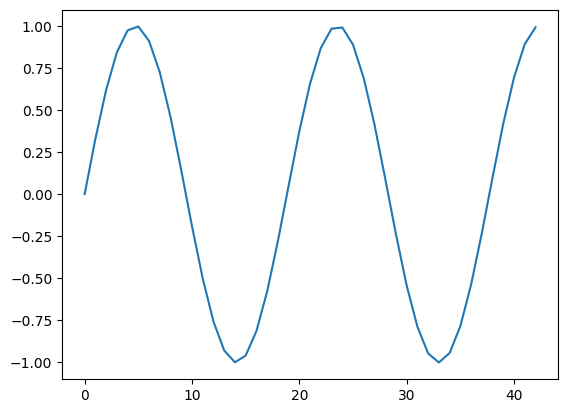

In [108]:
plt.plot(x)

In [132]:
h_x_1 = fftpack.hilbert(x)
h_r_1 = np.real(fftpack.hilbert(x))
h_i_1 = np.imag(fftpack.hilbert(x))

In [188]:
h_3 = signal.hilbert(x)
h_r_3 = np.real(signal.hilbert(x))
h_i_3 = np.imag(signal.hilbert(x))

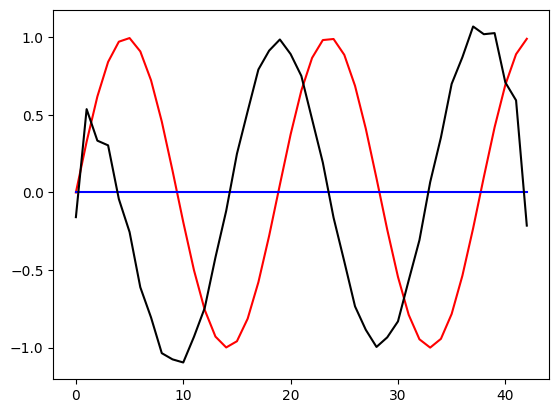

In [137]:
plt.plot(x, "red")
plt.plot(h_i_1, "blue")
plt.plot(h_r_1, "black")


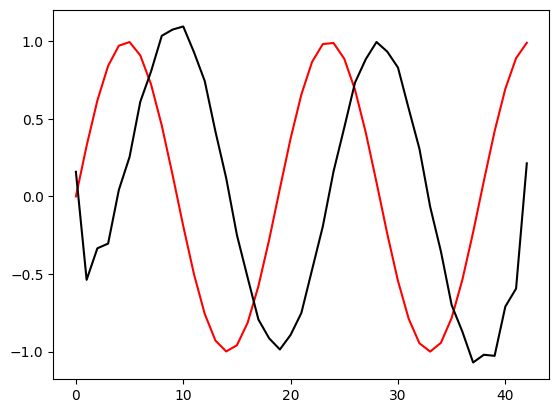

In [186]:
plt.plot(x, "red")
plt.plot(np.real(h_r_3), "blue")
plt.plot(np.real(h_i_3), "black")

In [207]:
phase_shift_in_radians = -0.5*np.pi
N = len(x)
R0 = np.exp(-1j*phase_shift_in_radians)
print("R0", R0)
R = np.ones(x.shape, dtype=np.complex128)
R[0]=0.
R[1:N//2] = R0
R[N//2:] = np.conj(R0)
for v in R:
    print(round(v))
print(R)
Xshifted = R* np.fft.fft(x)
h_2 = np.fft.ifft(Xshifted)
h_r_2 = -np.real(h_2)
h_i_2 = np.imag(h_2)

R0 (6.123233995736766e-17+1j)
0j
1j
1j
1j
1j
1j
1j
1j
1j
1j
1j
1j
1j
1j
1j
1j
1j
1j
1j
1j
1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
-1j
[0.000000e+00+0.j 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j
 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j
 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j
 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j
 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j
 6.123234e-17+1.j 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j
 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j
 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j
 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j
 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j
 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j]


/var/folders/3h/_x8nlrm56m31sglc23_3kx9c0000gp/T/ipykernel_72075/1689707582.py:10: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  print(round(v))


In [225]:
x = np.random.rand(43)
for i in range(x.shape[0]):
    x[i] = np.sin(i/3)

In [226]:
N = x.shape[0]
N_h = N // 2
print(N, N_h)
print()
Xf = np.fft.fft(x, N)
h = np.zeros(N, dtype=Xf.dtype)
if N % 2 == 0:
    h[0] = h[N // 2] = 1
    h[1:N // 2] = 2
else:
    h[0] = 1
    h[1:(N + 1) // 2] = 2
# print(h)

for i, v in enumerate(h):
    print(i, v)

y = np.fft.ifft(Xf * h)
# print(y)
for i, v in enumerate(y):
    print(i, x[i], v)

43 21

0 (1+0j)
1 (2+0j)
2 (2+0j)
3 (2+0j)
4 (2+0j)
5 (2+0j)
6 (2+0j)
7 (2+0j)
8 (2+0j)
9 (2+0j)
10 (2+0j)
11 (2+0j)
12 (2+0j)
13 (2+0j)
14 (2+0j)
15 (2+0j)
16 (2+0j)
17 (2+0j)
18 (2+0j)
19 (2+0j)
20 (2+0j)
21 (2+0j)
22 0j
23 0j
24 0j
25 0j
26 0j
27 0j
28 0j
29 0j
30 0j
31 0j
32 0j
33 0j
34 0j
35 0j
36 0j
37 0j
38 0j
39 0j
40 0j
41 0j
42 0j
0 0.0 (-1.4975101262385832e-16+0.1589707364248458j)
1 0.3271946967961522 (0.32719469679615193-0.5372796372803544j)
2 0.618369803069737 (0.6183698030697367-0.33414789061986216j)
3 0.8414709848078965 (0.8414709848078964-0.30377690892034187j)
4 0.9719379013633127 (0.9719379013633126+0.0419184558149002j)
5 0.9954079577517649 (0.9954079577517645+0.25499877469275206j)
6 0.9092974268256817 (0.9092974268256815+0.6110061018916936j)
7 0.7230858817383246 (0.7230858817383246+0.8056746662578061j)
8 0.457272626635812 (0.4572726266358119+1.0357368128351025j)
9 0.1411200080598672 (0.14112000805986732+1.0756975918688263j)
10 -0.19056796287548539 (-0.1905679628754852

In [223]:
np.angle(y[2])

-0.49541893471936627

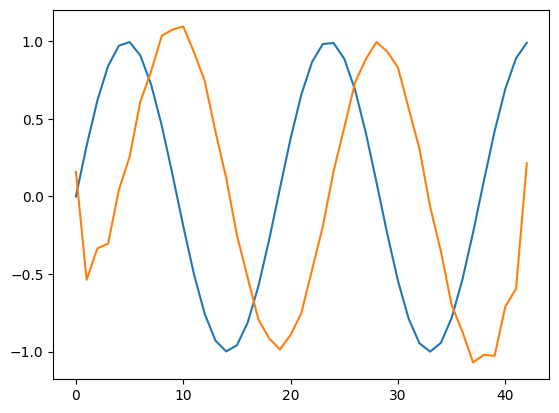

In [184]:
plt.plot(np.real(y))
plt.plot(np.imag(y))

In [189]:
np.imag(y) - np.imag(h_3)

array([ 1.11022302e-16,  1.11022302e-16, -5.55111512e-17, -1.11022302e-16,
        4.09394740e-16, -1.11022302e-16,  1.11022302e-16, -3.33066907e-16,
       -2.22044605e-16, -6.66133815e-16,  0.00000000e+00, -3.33066907e-16,
        1.11022302e-16, -1.66533454e-16,  3.33066907e-16, -1.66533454e-16,
       -1.11022302e-16, -2.22044605e-16,  3.33066907e-16,  3.33066907e-16,
       -1.11022302e-16,  0.00000000e+00, -1.66533454e-16,  0.00000000e+00,
       -2.49800181e-16, -5.55111512e-17,  3.33066907e-16,  1.11022302e-16,
        0.00000000e+00, -3.33066907e-16, -2.22044605e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -5.55111512e-17,  2.22044605e-16,
        0.00000000e+00, -2.22044605e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.22044605e-16,  4.16333634e-16])

In [191]:
np.real(y) - np.real(h_3)

array([-2.99502025e-16, -4.44089210e-16, -4.44089210e-16,  0.00000000e+00,
       -3.33066907e-16, -2.22044605e-16, -3.33066907e-16,  0.00000000e+00,
       -5.55111512e-17,  1.66533454e-16,  8.32667268e-17,  3.33066907e-16,
        0.00000000e+00,  3.33066907e-16,  1.11022302e-16,  2.22044605e-16,
        0.00000000e+00,  0.00000000e+00,  1.66533454e-16,  0.00000000e+00,
       -5.55111512e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.11022302e-16,
        1.66533454e-16, -8.32667268e-17,  0.00000000e+00, -3.33066907e-16,
        1.11022302e-16, -2.22044605e-16,  0.00000000e+00,  1.11022302e-16,
        1.11022302e-16,  4.16333634e-16,  8.32667268e-17,  1.66533454e-16,
        0.00000000e+00,  0.00000000e+00, -3.33066907e-16])

In [ ]:
Xf = sp_fft.fft(x, N, axis=axis)
h = np.zeros(N, dtype=Xf.dtype)
if N % 2 == 0:
    h[0] = h[N // 2] = 1
    h[1:N // 2] = 2
else:
    h[0] = 1
    h[1:(N + 1) // 2] = 2

if x.ndim > 1:
    ind = [np.newaxis] * x.ndim
    ind[axis] = slice(None)
    h = h[tuple(ind)]
y = sp_fft.ifft(Xf * h, axis=axis)

In [171]:
R = np.ones(x.shape, dtype=np.complex128)
R[0]=0.
R[1:N//2] = R0
R[N//2:] = np.conj(R0)
print(R)

[0.000000e+00+0.j 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j
 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j
 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j
 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j
 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j 6.123234e-17+1.j
 6.123234e-17+1.j 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j
 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j
 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j
 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j
 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j
 6.123234e-17-1.j 6.123234e-17-1.j 6.123234e-17-1.j]


In [154]:
h_r_2 + h_i_1

array([ 0.1581135 , -0.53441797, -0.33899872, -0.2969628 ,  0.03317743,
        0.26562009,  0.59856117,  0.81987681,  1.01985322,  1.09317788,
        1.0768117 ,  0.95025003,  0.7226987 ,  0.44107115,  0.0945076 ,
       -0.22414407, -0.54930985, -0.76657498, -0.94114812, -0.95902643,
       -0.91968536, -0.72370323, -0.49944712, -0.16583538,  0.13511462,
        0.47116132,  0.70841017,  0.90974209,  0.97159258,  0.95691757,
        0.80904293,  0.58671758,  0.28789074, -0.04890232, -0.37051317,
       -0.68539837, -0.88450848, -1.05919084, -1.02926703, -1.02027109,
       -0.71472205, -0.59071811,  0.21243661])

(0.5, 1.0)

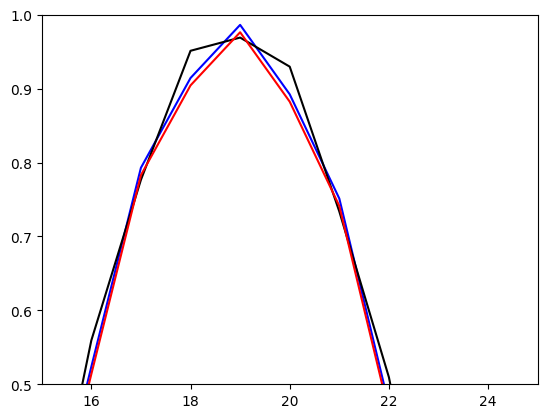

In [166]:
plt.plot(h_r_1, "blue")
plt.plot(-h_r_2 + 0.01, "black")
plt.plot(-h_i_3 - 0.01, "red")
plt.xlim([15,25])
plt.ylim([0.5, 1.0])

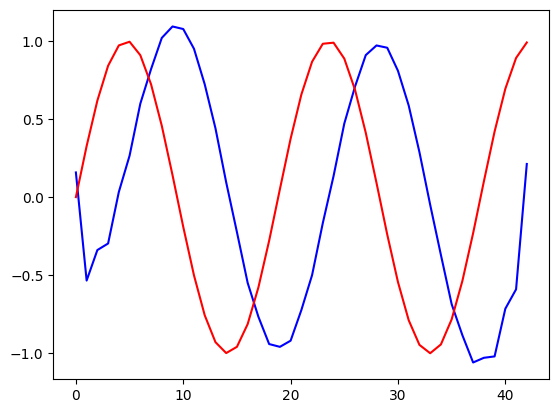

In [151]:
plt.plot(h_r_2, "blue")
# plt.plot(h_i_2, "black")
plt.plot(x, "red")

/Users/YVI/equinor/github/vds-slice/tests/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/YVI/equinor/github/vds-slice/tests/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


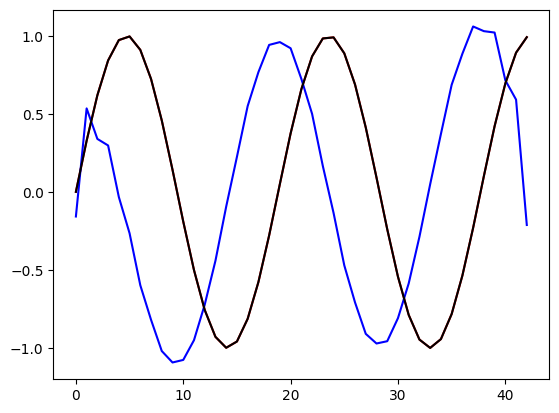

In [140]:
plt.plot(x, "red")
plt.plot(h_x_2, "blue")
plt.plot(h_x, "black")

In [120]:
h_x_3 = 

array([-0.00085724,  0.00286167, -0.00485083,  0.00681411, -0.00874103,
        0.01062132, -0.01244493,  0.01420215, -0.01588359,  0.01748029,
       -0.01898372,  0.02038586, -0.02167924,  0.02285695, -0.02391271,
        0.02484088, -0.02563652,  0.02629537, -0.02681393,  0.02718943,
       -0.02741985,  0.02750398, -0.02744136,  0.02723234, -0.02687801,
        0.02638028, -0.0257418 ,  0.02496598, -0.02405695,  0.02301957,
       -0.02185937,  0.02058254, -0.01919589,  0.01770682, -0.01612328,
        0.01445372, -0.01270704,  0.01089256, -0.00901996,  0.00709924,
       -0.00514064,  0.00315462, -0.00115176])

In [ ]:
R0 = np.exp(-1j*phase_shift_in_radians)
R = np.ones(x.shape, dtype=np.complex)
R[0]=0.
R[1:N//2] = R0;
R[N//2:] = np.conj(R0);

# Apply the phase shift in the frequency domain
Xshifted = R*fft(x);

# Recover the shifted time domain signal
y = np.real(ifft(Xshifted));

In [224]:
64*4

256

In [227]:
x = np.random.rand(43)
for i in range(x.shape[0]):
    x[i] = np.sin(i/3) + np.cos(i/1.5)

In [229]:
y = np.fft.fft(x)

In [230]:
for i, v in enumerate(y):
    print(i, x[i], v)

0 1.0 (3.470960728069585+0j)
1 1.1130819575731001 (4.294708058072328-0.9202458966458361j)
2 0.8536073763727264 (15.244208431723996-9.560473504728368j)
3 0.4253241482607541 (-5.4650222262513335+8.68391912235446j)
4 0.08261133315027136 (-3.7473276954270127+13.471715888148362j)
5 0.01373395304068592 (2.3703101777167896-13.97912250387313j)
6 0.25565380596206977 (0.6397709748243007-3.822517490019619j)
7 0.6773794969997441 (0.4567545306897074-2.112104958261999j)
8 1.0390761164949827 (0.41808966599975717-1.4277843489641797j)
9 1.1012902947102332 (0.41092879628661294-1.0607405298326125j)
10 0.7367997401754899 (0.4123919045174713-0.8300898680347606j)
11 -0.0038344074712282072 (0.4161688751578402-0.6696339713437086j)
12 -0.9023025291165419 (0.4202647091951297-0.5496983409377827j)
13 -1.655150388413487 (0.4240308202305212-0.4550767258205604j)
14 -1.994776769886186 (0.4272816564782387-0.3771855333975305j)
15 -1.797995803739591 (0.4299961344337576-0.3108034435118484j)
16 -1.1363387899429598 (0.4322